In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1BTb-laL2H20K1GAunTmI3kgYHIdXkF1_")

In [ ]:
X = df.drop(columns=["ID"])

In [ ]:
Analysis = pd.DataFrame({
    "Maximum": X.max(),
    "Minimum": X.min(),
    "Mean": X.mean(),
    "Standard Deviation": X.std(),
    "Median": X.median()
})

In [ ]:
Analysis

,Maximum,Minimum,Mean,Standard Deviation,Median
Feature_1,76.356784,-92.191424,-9.550985,35.156034,-11.786031
Feature_2,97.006320,-92.855696,-2.774238,52.966760,-31.490336
Feature_3,60.943972,-92.605668,-9.292683,40.296357,11.626790
Feature_4,93.505322,-80.463099,0.728588,41.285486,2.296700
Feature_5,96.963094,-97.823577,-23.015701,47.122160,-35.648302
Feature_6,94.926616,-93.869753,-2.961286,47.614206,-3.370144


In [ ]:
T = np.arange(X.shape[0])
X_array = np.array(X)

Feature_1


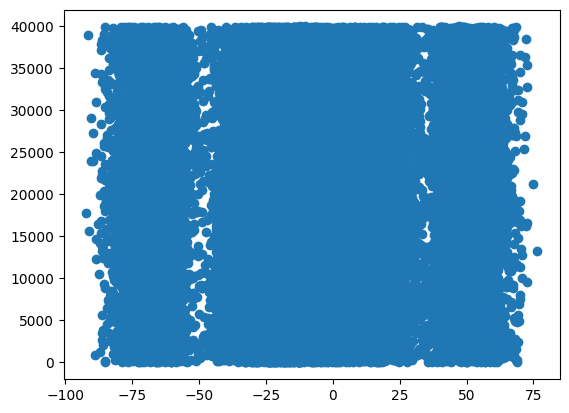

Feature_2


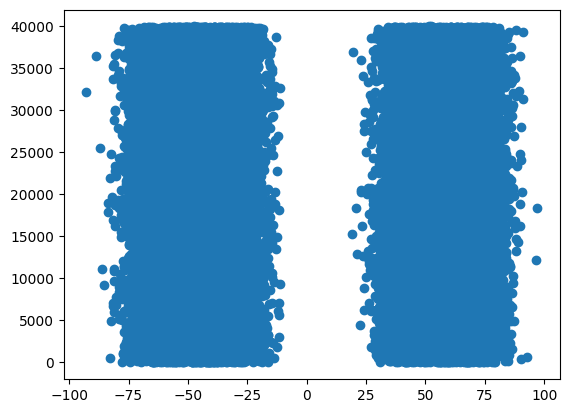

Feature_3


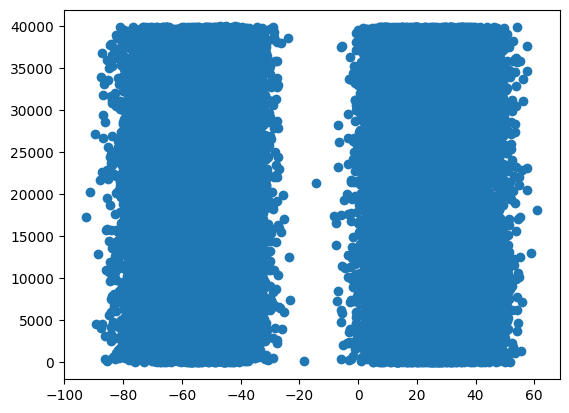

Feature_4


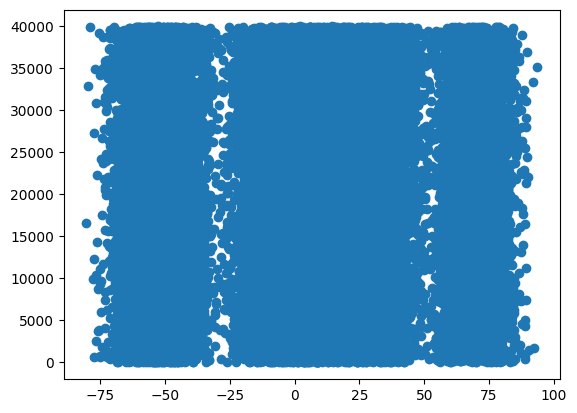

Feature_5


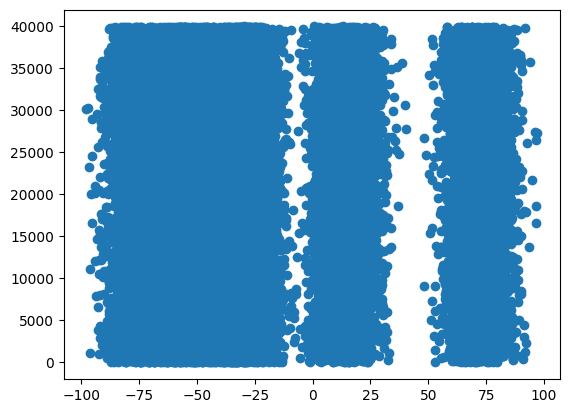

Feature_6


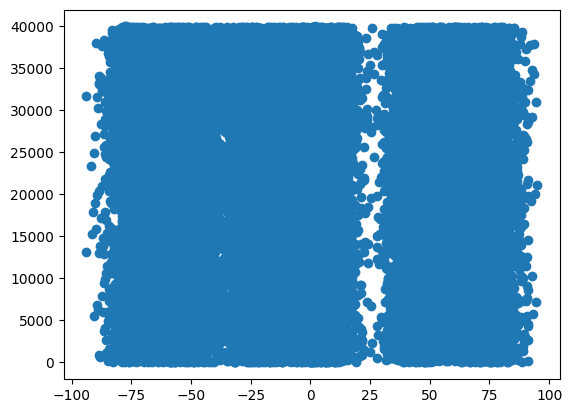

In [ ]:
for i in range(6):
  plt.scatter(X_array[:, i], T)
  print(X.columns[i])
  plt.show()

In [ ]:
class Modify():
  def __init__(self):
    pass

  def fit(self, X):
    self.min = X.min(axis=0)
    self.max = X.max(axis=0)
    self.mean = X.mean(axis=0)
    self.err = 1e-8
    self.std = X.std(axis=0) + self.err
    self.range = self.max-self.min + self.err

  def norm(self, X):
    try:
      return (X-self.min)/self.range
    except Exception as error_type:
      print("Error: ", error_type)

  def z_score(self, X):
    try:
      return (X-self.mean)/self.std
    except Exception as error_type:
      print("Error: ", error_type)

In [ ]:
class K_Means():
  def __init__(self, clusters=4, iterations=100):
    self.K = clusters
    self.p = iterations

  def distance(self, x, centroids):
    return np.linalg.norm(x-centroids, axis=1)

  def fit(self, X):
    self.X = np.array(X)
    m, n = self.X.shape
    self.modify = Modify()
    self.modify.fit(self.X)
    self.X = self.modify.z_score(self.X)

    centroids = []
    centroids.append(self.X[np.random.choice(m)])
    for _ in range(1, self.K):
      distances = np.array([min(np.linalg.norm(np.array(x) - np.array(c)) ** 2 for c in centroids) for x in self.X])
      probs = distances / np.sum(distances)
      centroids.append(self.X[np.random.choice(m, p=probs)])
    centroids = np.array(centroids)

    for itr in range(self.p):
      cluster_set = [[] for j in range(self.K)]
      for x in self.X:
        dist = self.distance(x, centroids)
        cluster = np.argmin(dist)
        cluster_set[cluster].append(x)

      new_centroids = []
      for i, cluster in enumerate(cluster_set):
        if len(cluster) == 0:
          distances = np.linalg.norm(self.X - centroids[i], axis=1)
          new_centroids.append(self.X[np.random.choice(m)])
        else:
          new_centroids.append(np.mean(cluster, axis=0))

      new_centroids = np.array(new_centroids)

      if np.allclose(centroids, new_centroids, atol=1e-6):
        break
      centroids = new_centroids

    self.centroids = centroids
    if (n==2):
      plt.scatter(self.X[:,0], self.X[:,1], color='blue')
      plt.scatter(centroids[:,0], centroids[:,1], color='red')
      plt.show()

  def predict(self, X):
    X = self.modify.z_score(np.array(X))
    labels = []
    for x in X:
        labels.append(np.argmin(self.distance(x, self.centroids)))
    return np.array(labels)


In [ ]:
model = K_Means(clusters=3, iterations=100)
model.fit(X)

In [ ]:
L = []
model = K_Means(clusters=3, iterations=100)
for _ in range(1000):
  model.fit(X)
  R = model.predict(X)
  A, B = np.unique(R, return_counts=True)
  L.append(B)
print(L)

[array([22551,  5714, 11735]), array([17144,  5714, 17142]), array([17144, 17142,  5714]), array([ 5715, 11428, 22857]), array([11428, 11429, 17143]), array([ 5715, 22857, 11428]), array([11428,  5715, 22857]), array([ 5742, 22830, 11428]), array([28571,  5714,  5715]), array([ 5714, 17142, 17144]), array([ 5714, 17144, 17142]), array([ 5714,  5715, 28571]), array([22856, 11430,  5714]), array([ 5715, 11429, 22856]), array([11735,  5714, 22551]), array([17138,  5714, 17148]), array([17138, 17148,  5714]), array([ 5714, 17138, 17148]), array([17138, 17148,  5714]), array([11558, 22728,  5714]), array([22856,  5714, 11430]), array([17142,  5714, 17144]), array([17148, 17138,  5714]), array([17142,  5715, 17143]), array([ 5714, 17142, 17144]), array([17144, 17142,  5714]), array([ 5714, 22857, 11429]), array([22857, 11429,  5714]), array([17144,  5714, 17142]), array([ 5715, 11428, 22857]), array([ 5714, 17144, 17142]), array([17144, 17142,  5714]), array([11428, 17143, 11429]), array([ 5

<function matplotlib.pyplot.show(close=None, block=None)>

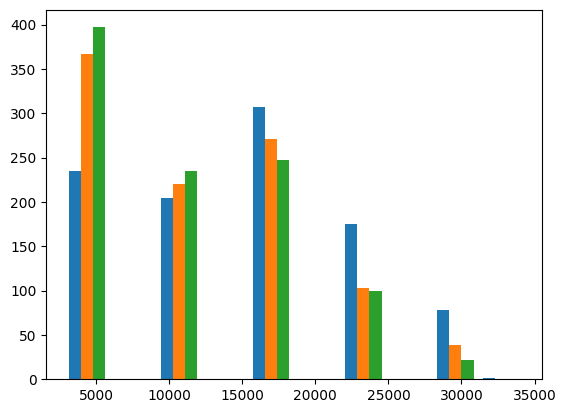

In [ ]:
U = pd.DataFrame(L)
plt.hist(U)
plt.show